In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# df = pd.read_csv('mod_data_for_decision_tree.csv')
df = pd.read_json('mod_data_prime.json')
df['endorsement_count'].median()

34.0

In [17]:
df['status'].unique()

array(['published', 'hidden', 'removed', 'not_published', 'wastebinned',
       'under_moderation'], dtype=object)

Get endorsement count distribution

[8378 1122 1012 ...    1    1    1]


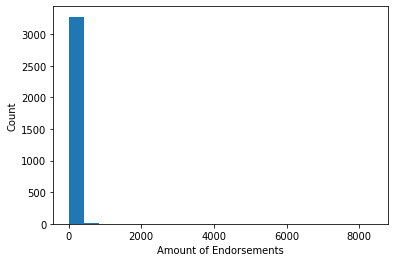

In [30]:
df_endorsement_count_dist = df[df['endorsement_count'] <= 1200]

end_counts = df['endorsement_count'].value_counts()

print(end_counts.values)

plt.hist(end_counts, bins=20)
plt.xlabel('Amount of Endorsements')
plt.ylabel('Count')
plt.show()

Get number of data for each mod category

96     4958
54     3246
29     3033
24     2434
84     2372
       ... 
12        1
107       1
106       1
31        1
5         1
Name: category_id, Length: 75, dtype: int64


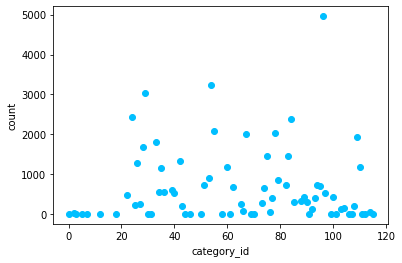

In [19]:
cat_counts = df['category_id'].value_counts()

print(cat_counts)

plt.scatter(cat_counts.index, cat_counts, c='deepskyblue')
plt.xlabel('category_id')
plt.ylabel('count')
plt.show()

In [5]:
print('median:', cat_counts.median())

filtered_cat = cat_counts[cat_counts > 300]

safe_categories = filtered_cat.index.tolist()

df2 = df[df['category_id'].isin(safe_categories)]
df2 = df2[(df2['endorsement_count'] <= 1000)]

median: 256.0


In [13]:
from dataset_preprocessor import perform_oversampling

print('Original data:')
print(df2['high'].value_counts())

df2 = perform_oversampling(df2)

print('-'*10)
print('After oversampling:')
print(df2['high'].value_counts())

Original data:
0    14206
1     9282
Name: high, dtype: int64
----------
After oversampling:
0    14206
1    14206
Name: high, dtype: int64


In [258]:
indexes = df2.index.tolist()

# Save mod indexes to txt file
with open('mod_indexes.txt', 'w') as f:
    for index in indexes:
        f.write(f'{str(index)}\n')

In [242]:
from sklearn.model_selection import train_test_split

df2['author'] = df2['author'].astype('category')
df2['uploaded_by'] = df2['uploaded_by'].astype('category')

cat_columns = df2.select_dtypes(['category']).columns
df2[cat_columns] = df2[cat_columns].apply(lambda x: x.cat.codes)

seed = 69420

y = df2['high']
x = df2.drop(['high', 'endorsement_count', 'created_time'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=df2['high'], random_state=seed)

In [3]:
df3 = pd.read_json('mod_data_prime.json')

In [4]:
df3.isna().sum()

name                          13524
summary                       13524
description                   13524
picture_url                   14012
uid                               0
mod_id                            0
game_id                           0
allow_rating                      0
domain_name                       0
category_id                       0
version                           0
endorsement_count                 0
created_timestamp                 0
created_time                      0
updated_timestamp                 0
updated_time                      0
author                            0
uploaded_by                       0
uploaded_users_profile_url        0
contains_adult_content            0
status                            0
available                         0
user                              4
endorsement                       0
dtype: int64

Get category references

In [31]:
df_category = pd.read_csv('categories.csv')

df_category.head()

Category name  category id
0          Alchemy           94
1        Animation           51
2           Armour           54
3  Armour - Shield          103
4            Audio          110